![image.jpeg](PlayStore.jpeg)

# **Data Cleaning and Analysis Activities**

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**`Note:` it's better to make a copy from the dataframe and test on it before making any changes in the orignal one**

### 1.Which of the following column(s) has/have null values?

Select the columns that you have identified having null/missing values.

In [5]:
df = pd.read_csv("googleplaystore.csv")
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
missingVal = df.isna().sum()
print(missingVal[missingVal > 0])
 # columns with null values and number of null values in each columns

Rating            1474
Type                 1
Content Rating       1
Current Ver          8
Android Ver          3
dtype: int64


### 2. Clean the Rating Column and Other Columns Containing Null Values

**Steps:**

0. Try plotting a histogram and a boxplot for this column to understand the issue
1. Remove invalid values from the Rating column (set them as NaN).
2. Fill null values in the Rating column using the mean().
3. Clean any other non-numerical columns by dropping the rows containing null values.
4. Perform the modifications "in place", modifying `df`. If you make a mistake, re-load the data.

**Details:**
- Replace all ratings not in the range of 0 to 5 with NaN.
- Drop rows with null values in other columns.

In [11]:
print(plt.style.available)
plt.style.use('classic')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


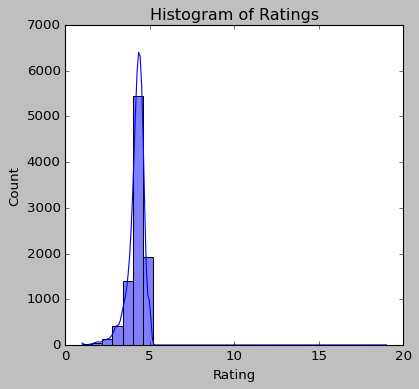

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Rating'], bins=30, kde=True)
plt.title("Histogram of Ratings")
plt.show()

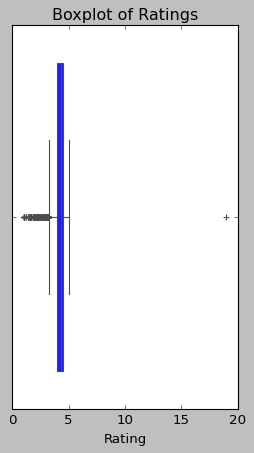

In [20]:

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Rating'])
plt.title("Boxplot of Ratings")
plt.show()

In [22]:
# clean Ratings column
df.loc[(df['Rating'] < 0) | (df['Rating'] > 5), 'Rating'] = None

In [25]:
df['Rating'].fillna(df['Rating'].mean(), inplace=True)


C:\Users\Basmala\AppData\Local\Temp\ipykernel_15416\1343472025.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].mean(), inplace=True)


In [26]:
df.dropna(subset=['Type', 'Content Rating', 'Current Ver', 'Android Ver'], inplace=True)


In [27]:
print(df.isnull().sum())


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


### 3. Clean the Reviews Column and Make It Numeric

You'll notice that some columns from this dataframe which should be numeric, were parsed as object (string). That's because sometimes the numbers are expressed with M, or k to indicate Mega or kilo.

Clean the Reviews column by transforming the values to the correct numeric representation. 

For example, 5M should be 5000000.

In [30]:

df['Reviews'] = df['Reviews'].replace({'M': '*1e6', 'k': '*1e3'}, regex=True).map(pd.eval).astype(int)


In [31]:
print(df['Reviews'].dtype)  
print(df['Reviews'].head()) 

int64
0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: int64


### 4. Count the Number of Duplicated Apps

Count the number of duplicated rows. That is, if the app Twitter appears 2 times, that counts as 2.

In [ ]:
# All Duplicated Apps
duplicateApps = df.duplicated(subset=['App'], keep=False).sum()
print("Number of duplicated apps:", duplicateApps)

Number of duplicated apps: 1979


In [ ]:
# each app and how many times it duplicates
appCounts = df['App'].value_counts()
print(appCounts[appCounts > 1])


App
ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
ESPN                                                 7
                                                    ..
CBS Sports Fantasy                                   2
PMHNP-BC Pocket Prep                                 2
Podcast App: Free & Offline Podcasts by Player FM    2
Microsoft PowerPoint                                 2
Coloring book moana                                  2
Name: count, Length: 798, dtype: int64


### 5. Drop Duplicated Apps Keeping Only the Ones with the Greatest Number of Reviews

Now that the Reviews column is numeric, we can use it to clean duplicated apps. Drop duplicated apps, keeping just one copy of each, the one with the greatest number of reviews.

Hint: you'll need to sort the dataframe by App and Reviews, and that will change the order of your df.

In [ ]:
df = df.sort_values(by=['App', 'Reviews'], ascending=[True, False])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 8884 to 882
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  int64  
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [39]:
df = df.drop_duplicates(subset='App', keep='first')
print(df['App'].value_counts())

App
【Miku AR Camera】Mikuture                  1
► MultiCraft ― Free Miner! 👍              1
သိင်္ Astrology - Min Thein Kha BayDin    1
বাংলাflix                                 1
বাংলা টিভি প্রো BD Bangla TV              1
                                         ..
/u/app                                    1
.R                                        1
- Free Comics - Comic Apps                1
+Download 4 Instagram Twitter             1
"i DT" Fútbol. Todos Somos Técnicos.      1
Name: count, Length: 9648, dtype: int64


### 6. Format the Category Column

Categories are all uppercase and words are separated using underscores. Instead, we want them with capitalized in the first character and the underscores transformed as whitespaces.

Example, the category AUTO_AND_VEHICLES should be transformed to: Auto and vehicles. Also, if you find any other wrong value transform it into an Unknown category.

In [40]:
df['Category'] = df['Category'].str.replace('_', ' ').str.title()
validCategories = df['Category'].unique()  
df.loc[~df['Category'].isin(validCategories), 'Category'] = 'Unknown Category'

print(df['Category'].unique())

['Sports' 'Social' 'Comics' 'Tools' 'Communication' 'News And Magazines'
 'Health And Fitness' 'Family' 'Books And Reference' 'Lifestyle'
 'Business' 'Shopping' 'Medical' 'Game' 'Finance' 'Personalization'
 'Photography' 'Travel And Local' 'Dating' 'Productivity' 'Art And Design'
 'Food And Drink' 'Video Players' 'House And Home' 'Maps And Navigation'
 'Events' 'Education' 'Auto And Vehicles' 'Weather' 'Beauty'
 'Entertainment' 'Libraries And Demo' 'Parenting']


### 7. Clean and Convert the Installs Column to Numeric Type

Clean and transform Installs as a numeric type. Some values in Installs will have a + modifier. Just remove the string and honor the original number (for example +2,500 or 2,500+ should be transformed to the number 2500).

In [46]:
df['Installs'] = df['Installs'].astype(str)
df['Installs'] = df['Installs'].str.replace('+', '', regex=False)  #remove "+"
df['Installs'] = df['Installs'].str.replace(',', '', regex=False)  # remove ","
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')  #convert to numbers

print(df['Installs'].head(20))

8884          500
8532      1000000
324         10000
4541        10000
4636        10000
5940          100
10252      100000
1393       500000
8483       100000
7738          100
8219          500
9401     10000000
4030         5000
8703        10000
4026        50000
220       1000000
2694     10000000
5344        50000
2483            5
6760         1000
Name: Installs, dtype: int64


### 8. Clean and Convert the Size Column to Numeric (Representing Bytes)

The Size column is of type object. Some values contain either a M or a k that indicate Kilobytes (1024 bytes) or Megabytes (1024 kb). These values should be transformed to their corresponding value in bytes. For example, 898k will become 919552 (898 * 1024).

Some other values are completely invalid (there's no way to infer the numeric type from them). For these, just replace the value for 0.

Some other rules are related to + modifiers, apply the same rules as the previous task.

In [48]:
df['Size'] = df['Size'].astype(str)  
df['Size'] = df['Size'].str.replace('+', '', regex=False)  
df['Size'] = df['Size'].str.replace(',', '', regex=False) 

df[['Size_value', 'Size_unit']] = df['Size'].str.extract(r'([\d\.]+)([Mk]?)')
# ([\d\.]+)
# \d  → Matches any digit (0-9).
# \.  → Matches the decimal point (to handle values like 1.5M).
# +   → Matches one or more digits or decimal points (e.gو "1.5" or "1000").
# ➝ This is stored in the 'Size_value' column.
# 
# ([Mk]?)
# [Mk] → Matches either 'M' (Megabytes) or 'k' (Kilobytes) if present.
# # (?)   → Makes the presence of 'M' or 'k' optional (some values might be plain numbers like "100").

df['Size_value'] = pd.to_numeric(df['Size_value'], errors='coerce')

df.loc[df['Size_unit'] == 'M', 'Size_value'] *= 1024 * 1024  # 1M = 1024 KB * 1024 B
df.loc[df['Size_unit'] == 'k', 'Size_value'] *= 1024  # 1k = 1024 B

df['Size_value'].fillna(0, inplace=True)


df['Size'] = df['Size_value'].astype(int)

df.drop(columns=['Size_value', 'Size_unit'], inplace=True)
print(df[['Size']].head(10))

           Size
8884    3774873
8532   23068672
324     9542041
4541     207872
4636   55574528
5940   14680064
10252  42991616
1393    3984588
8483   50331648
7738    3984588


C:\Users\Basmala\AppData\Local\Temp\ipykernel_15416\1953561183.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Size_value'].fillna(0, inplace=True)


### 9. Clean and Convert the Price Column to Numeric

Values of the Price column are strings representing price with special symbol '$'.

In [ ]:

df['Price'] = df['Price'].astype(str)
df['Price'] = df['Price'].str.replace('$', '', regex=False)

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

df['Price'].fillna(0, inplace=True)
print(df[['Price']].head(20))

       Price
8884    0.00
8532    0.00
324     0.00
4541    0.00
4636    0.00
5940    0.00
10252   0.00
1393    0.00
8483    0.00
7738    1.49
8219    0.99
9401    0.00
4030    0.00
8703    0.00
4026    0.00
220     0.00
2694    0.00
5344    0.00
2483    0.00
6760    3.08


### 10. Paid or Free?

Now that you have cleaned the Price column, let's create another auxiliary Distribution column.

This column should contain Free/Paid values depending on the app's price.

In [53]:

df['Distribution'] = df['Price'].apply(lambda x: 'Paid' if x > 0 else 'Free')
print(df[['Price', 'Distribution']].head(10))


       Price Distribution
8884    0.00         Free
8532    0.00         Free
324     0.00         Free
4541    0.00         Free
4636    0.00         Free
5940    0.00         Free
10252   0.00         Free
1393    0.00         Free
8483    0.00         Free
7738    1.49         Paid


In [54]:
print(df['Distribution'].value_counts())

Distribution
Free    8897
Paid     751
Name: count, dtype: int64


## Finally!!! 
- Now all is left is to save the new dataframe we made into a new csv file called `filteredplaystore.csv`

In [56]:
df.to_csv('filteredplaystore.csv', index=False)


In [ ]:
df_check = pd.read_csv('filteredplaystore.csv')
print(df_check.head())

                                    App       Category    Rating  Reviews  \
0  "i DT" Fútbol. Todos Somos Técnicos.         Sports  4.191757       27   
1         +Download 4 Instagram Twitter         Social  4.500000    40467   
2            - Free Comics - Comic Apps         Comics  3.500000      115   
3                                    .R          Tools  4.500000      259   
4                                /u/app  Communication  4.700000      573   

       Size  Installs  Type  Price Content Rating         Genres  \
0   3774873       500  Free    0.0       Everyone         Sports   
1  23068672   1000000  Free    0.0       Everyone         Social   
2   9542041     10000  Free    0.0     Mature 17+         Comics   
3    207872     10000  Free    0.0       Everyone          Tools   
4  55574528     10000  Free    0.0     Mature 17+  Communication   

         Last Updated Current Ver Android Ver Distribution  
0     October 7, 2017        0.22  4.1 and up         Free  
1     